In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingCVClassifier
from sklearn.dummy import DummyClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize

In [2]:
df = pd.read_csv("df.csv")

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df

,Gender,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,Income,Mode,Time,...,Geodesic_distance,Age_20 and less,Age_21 - 30,Age_31 -40,Age_41 - 50,Age_51 and more,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
0,0,0,0,0,0,4,3,750,1,60,...,7.157182,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,3,1,750,1,40,...,13.814558,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,3,1,250,1,35,...,6.063515,0,1,0,0,0,1,0,0,0
3,1,1,1,0,0,4,4,750,0,6,...,0.350000,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,3,2,750,0,46,...,15.334968,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,1,1,0,0,4,2,1250,0,18,...,7.410076,0,0,1,0,0,0,0,1,0
377,1,1,0,0,0,1,0,750,1,60,...,8.835484,0,0,0,1,0,0,1,0,0
378,0,1,0,1,1,3,1,750,2,44,...,2.680253,0,1,0,0,0,1,0,0,0
379,1,0,0,0,0,3,0,750,1,18,...,1.869763,0,1,0,0,0,0,0,1,0


In [5]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['Gender', 'Driver_licence', 'Motor_licence', 'Bike', 'Skate', 'Hsize',
       'Vehicles', 'Income', 'Mode', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Geodesic_distance', 'Age_20 and less', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 and more', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other'],
      dtype='object')

We will run Variance Inflator frequency to reduce multicollinearity

In [11]:
drops = ['Mode', 'Bike', 'Skate', 'Motor_licence', 'Driver_licence', 'Vehicles', 'Distance']
X = df.drop(drops, axis=1)
y= df["Mode"]

In [12]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable       VIF
0                       const  0.000000
1                      Gender  1.128137
2                       Hsize  1.049652
3                      Income  1.670569
4                        Time  1.450247
5                 Convenience  1.507967
6                        Cost  1.203795
7                      Safety  1.890295
8                 Environment  1.509119
9                      Health  1.727472
10                    Weather  1.453456
11                    Parking  1.465103
12          Geodesic_distance  1.393139
13            Age_20 and less       inf
14                Age_21 - 30       inf
15                 Age_31 -40       inf
16                Age_41 - 50       inf
17            Age_51 and more       inf
18  Depart_time_06.00 - 09.00       inf
19  Depart_time_09.00 - 12.00       inf
20  Depart_time_12.00 - 15.00       inf
21          Depart_time_Other       inf


In [13]:
drops = ['Mode','Bike', 'Skate', 'Motor_licence', 'Driver_licence', 'Vehicles', 'Distance', 'Depart_time_06.00 - 09.00', 'Age_21 - 30']
X = df.drop(drops, axis=1)
y= df["Mode"]

In [14]:
df_with_constant = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]
print(vif_data)

                     Variable        VIF
0                       const  63.946863
1                      Gender   1.128137
2                       Hsize   1.049652
3                      Income   1.670569
4                        Time   1.450247
5                 Convenience   1.507967
6                        Cost   1.203795
7                      Safety   1.890295
8                 Environment   1.509119
9                      Health   1.727472
10                    Weather   1.453456
11                    Parking   1.465103
12          Geodesic_distance   1.393139
13            Age_20 and less   1.261394
14                 Age_31 -40   1.430897
15                Age_41 - 50   1.417580
16            Age_51 and more   1.301150
17  Depart_time_09.00 - 12.00   1.325243
18  Depart_time_12.00 - 15.00   1.356247
19          Depart_time_Other   1.268296


Those will be the final features

In [15]:
df

,Gender,Driver_licence,Motor_licence,Bike,Skate,Hsize,Vehicles,Income,Mode,Time,...,Geodesic_distance,Age_20 and less,Age_21 - 30,Age_31 -40,Age_41 - 50,Age_51 and more,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
0,0,0,0,0,0,4,3,750,1,60,...,7.157182,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,3,1,750,1,40,...,13.814558,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,3,1,250,1,35,...,6.063515,0,1,0,0,0,1,0,0,0
3,1,1,1,0,0,4,4,750,0,6,...,0.350000,0,1,0,0,0,1,0,0,0
4,0,1,0,0,0,3,2,750,0,46,...,15.334968,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,1,1,0,0,4,2,1250,0,18,...,7.410076,0,0,1,0,0,0,0,1,0
377,1,1,0,0,0,1,0,750,1,60,...,8.835484,0,0,0,1,0,0,1,0,0
378,0,1,0,1,1,3,1,750,2,44,...,2.680253,0,1,0,0,0,1,0,0,0
379,1,0,0,0,0,3,0,750,1,18,...,1.869763,0,1,0,0,0,0,0,1,0


In [6]:
drops = ['Mode','Bike', 'Skate', 'Motor_licence', 'Driver_licence', 'Vehicles', 'Distance', 'Depart_time_06.00 - 09.00', 'Age_21 - 30']
X = df.drop(drops, axis=1)
y= df["Mode"]

In [7]:
X

,Gender,Hsize,Income,Time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Geodesic_distance,Age_20 and less,Age_31 -40,Age_41 - 50,Age_51 and more,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_Other
0,0,4,750,60,1,3,2,4,5,3,4,7.157182,0,0,0,0,1,0,0
1,0,3,750,40,4,4,4,2,2,2,3,13.814558,0,0,0,0,0,0,0
2,1,3,250,35,4,5,3,2,1,4,2,6.063515,0,0,0,0,0,0,0
3,1,4,750,6,5,3,3,3,3,5,3,0.350000,0,0,0,0,0,0,0
4,0,3,750,46,5,5,5,2,3,5,5,15.334968,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0,4,1250,18,5,3,5,3,3,3,5,7.410076,0,1,0,0,0,1,0
377,1,1,750,60,3,5,3,5,3,3,3,8.835484,0,0,1,0,1,0,0
378,0,3,750,44,4,3,3,4,5,5,3,2.680253,0,0,0,0,0,0,0
379,1,3,750,18,4,5,3,4,3,3,3,1.869763,0,0,0,0,0,1,0


In [8]:
X, y = shuffle(X, y, random_state=123)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42, stratify=y)

In [10]:
X_train.columns

Index(['Gender', 'Hsize', 'Income', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 and less', 'Age_31 -40', 'Age_41 - 50', 'Age_51 and more',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other'],
      dtype='object')

In [11]:
X_test.columns

Index(['Gender', 'Hsize', 'Income', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 and less', 'Age_31 -40', 'Age_41 - 50', 'Age_51 and more',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other'],
      dtype='object')

In [12]:
features = ['Gender', 'Hsize', 'Income', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 and less', 'Age_31 -40', 'Age_41 - 50', 'Age_51 and more',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other']

In [13]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    83
1    73
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    55
2    49
1    49
Name: count, dtype: int64


In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((228, 19), (228,), (153, 19), (153,))

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dummy classifier

In [84]:
dummy_classifier = DummyClassifier(strategy="uniform")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.30
Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.36      0.37        55
           1       0.23      0.22      0.23        49
           2       0.29      0.31      0.30        49

    accuracy                           0.30       153
   macro avg       0.30      0.30      0.30       153
weighted avg       0.30      0.30      0.30       153



In [85]:
dummy_classifier = DummyClassifier(strategy="stratified")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.35
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.31      0.29        55
           1       0.45      0.41      0.43        49
           2       0.34      0.33      0.33        49

    accuracy                           0.35       153
   macro avg       0.36      0.35      0.35       153
weighted avg       0.35      0.35      0.35       153



In [86]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.36
Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53        55
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        49

    accuracy                           0.36       153
   macro avg       0.12      0.33      0.18       153
weighted avg       0.13      0.36      0.19       153



# Decision Tree

In [16]:
dt_model = DecisionTreeClassifier(random_state=11)
dt_model.fit(X_train, y_train)
max_depth = dt_model.tree_.max_depth
max_depth

9

In [17]:
y_pred_test = dt_model.predict(X_train)
Tree_Report = classification_report(y_train, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        72

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [18]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        55
           1       0.73      0.76      0.74        49
           2       0.78      0.71      0.74        49

    accuracy                           0.77       153
   macro avg       0.77      0.77      0.77       153
weighted avg       0.77      0.77      0.77       153



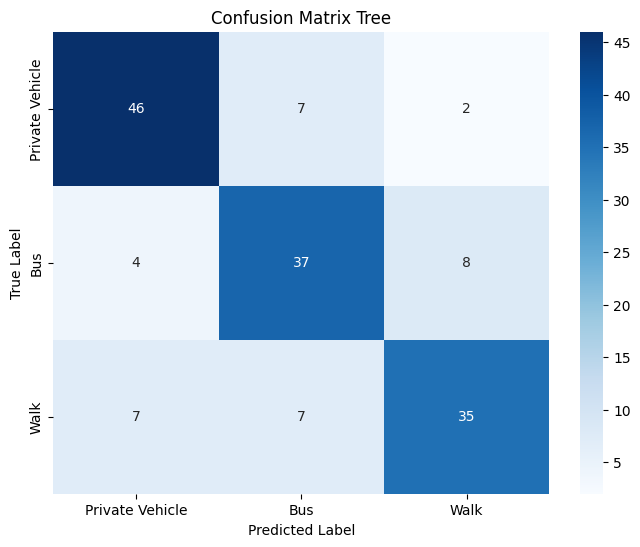

In [19]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
param_grid = {
    'max_depth': list(range(2, 9))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=11),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

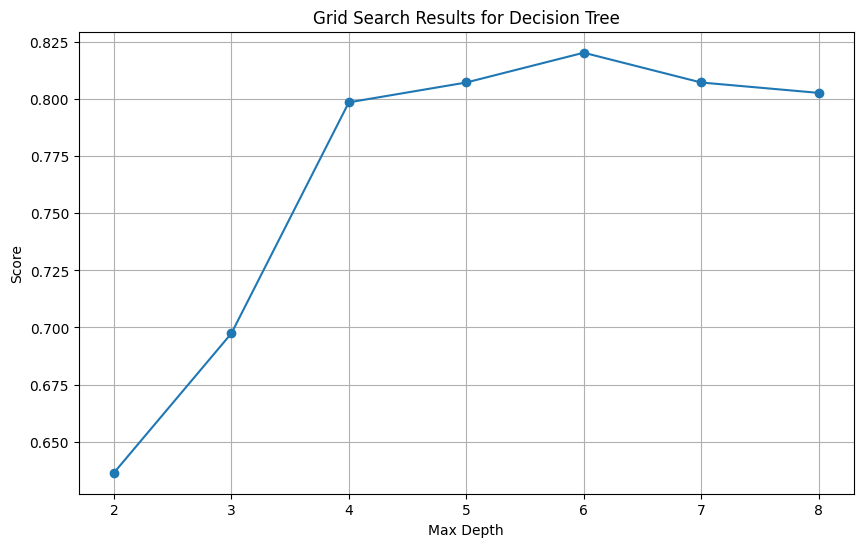

In [21]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [22]:
dt_model = DecisionTreeClassifier(random_state=11, max_depth=6)
dt_model.fit(X_train, y_train)
y_pred_test = dt_model.predict(X_train)
Tree_Report = classification_report(y_train, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        83
           1       0.95      1.00      0.97        73
           2       1.00      0.97      0.99        72

    accuracy                           0.98       228
   macro avg       0.98      0.98      0.98       228
weighted avg       0.98      0.98      0.98       228



In [23]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        55
           1       0.71      0.76      0.73        49
           2       0.77      0.69      0.73        49

    accuracy                           0.76       153
   macro avg       0.76      0.76      0.76       153
weighted avg       0.77      0.76      0.76       153



In [24]:
dt_model = DecisionTreeClassifier(random_state=11)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_samples_split': [1, 2, 3, 4,  5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
}
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [25]:
bestp = grid_search_dt.best_params_
bestp

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [26]:
tree=grid_search_dt.best_estimator_
y_pred_log = tree.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Tree_Report:', Log_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        83
           1       0.93      0.90      0.92        73
           2       0.95      0.99      0.97        72

    accuracy                           0.93       228
   macro avg       0.93      0.94      0.93       228
weighted avg       0.93      0.93      0.93       228



In [27]:
y_pred_tree = tree.predict(X_test)
tree_Report = classification_report(y_test, y_pred_tree)
print('Tree_Report:', tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        55
           1       0.78      0.71      0.74        49
           2       0.76      0.76      0.76        49

    accuracy                           0.78       153
   macro avg       0.78      0.77      0.77       153
weighted avg       0.78      0.78      0.78       153



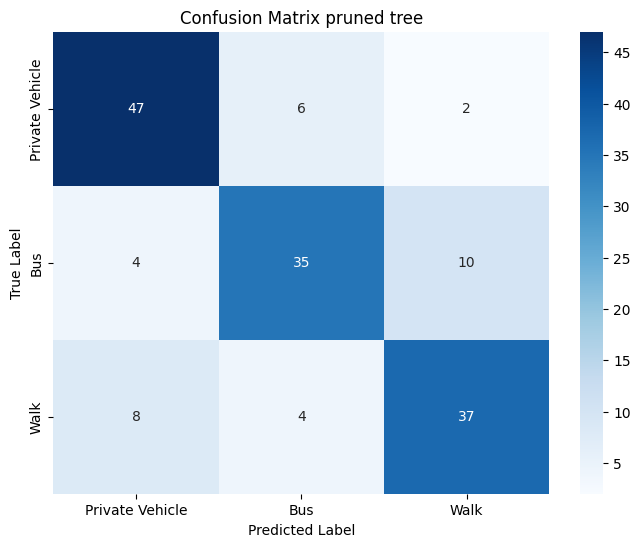

In [28]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

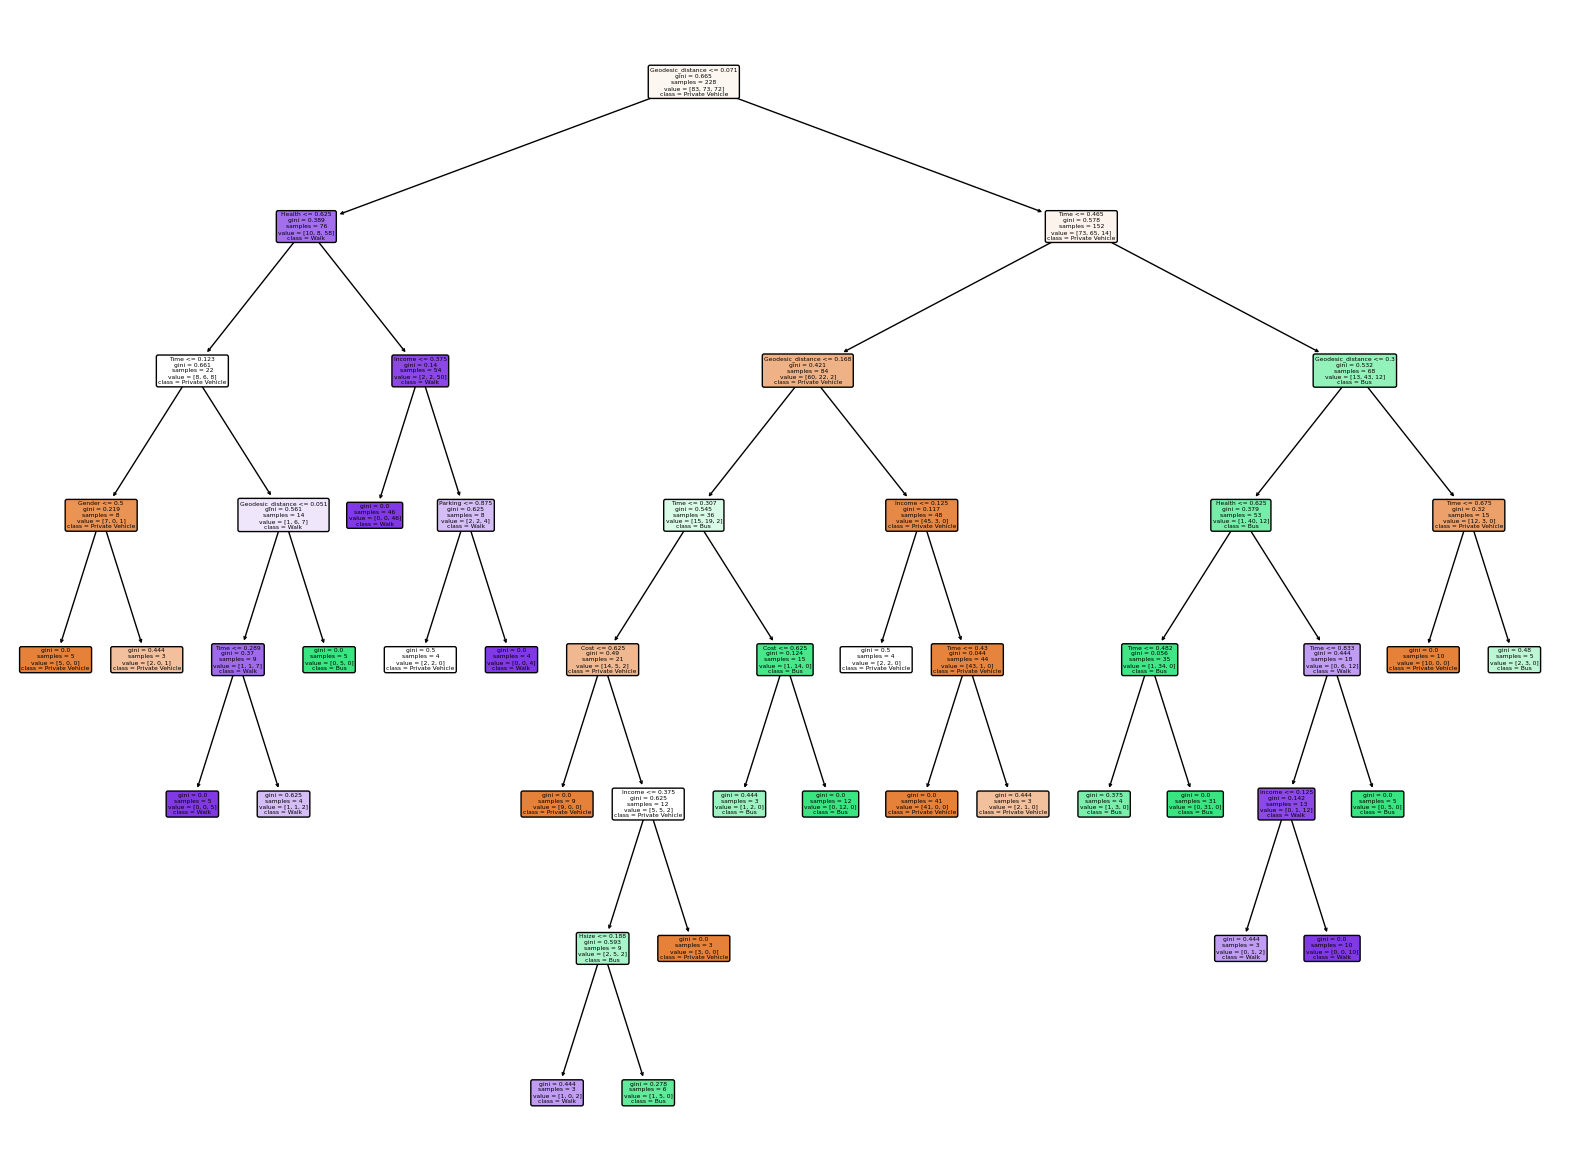

In [29]:
plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True, feature_names=features, class_names=class_labels, rounded=True)
plt.show()

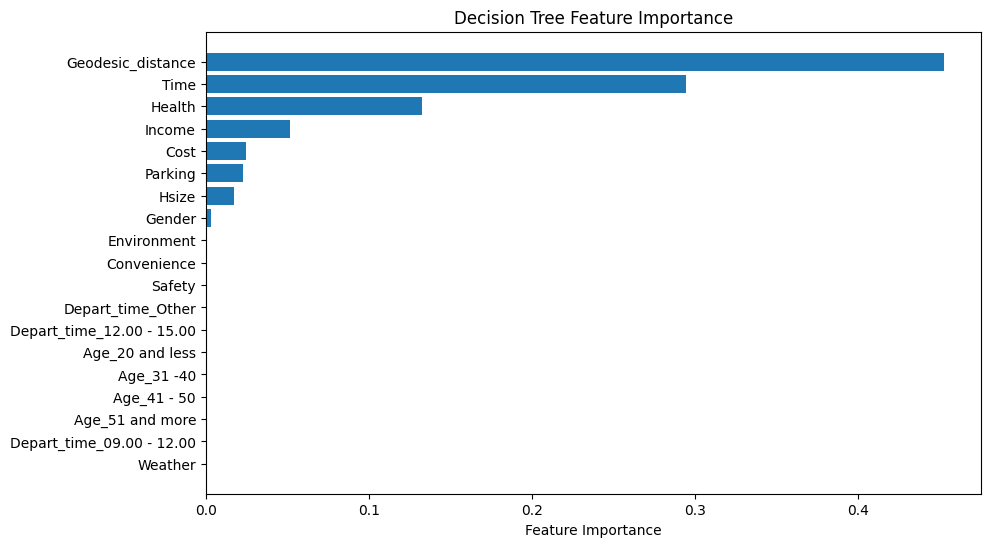

In [30]:
feature_importances = tree.feature_importances_



sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [31]:
class_labels_mapping = {
    0: 'private vehicle',
    1: 'bus',
    2: 'walk'
}

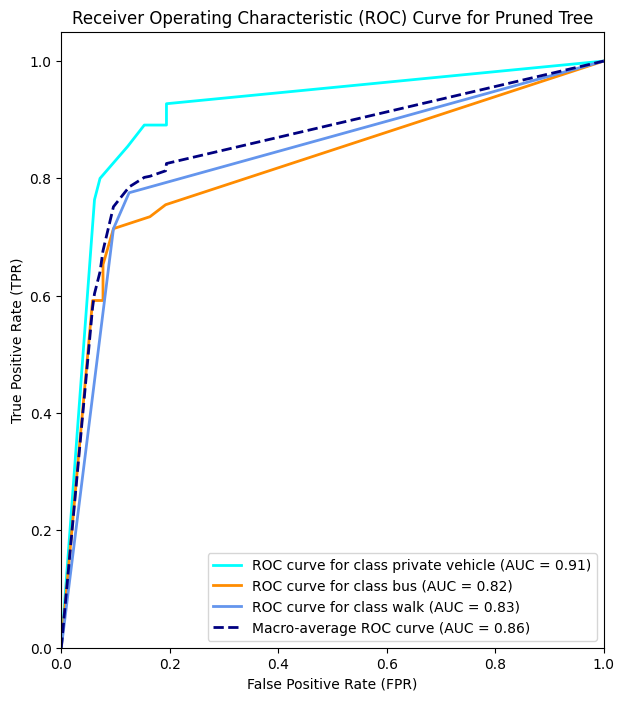

In [32]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(tree.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(tree.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(tree.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(tree.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(tree.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Pruned Tree")

plt.show()

In [33]:
roc_auc["macro"]

0.855635011247256

# Random Forest

In [34]:
X_train.shape, X_test.shape

((228, 19), (153, 19))

In [35]:
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)
y_pred_rf_basic = rf_model.predict(X_train)
reportrfbasic = classification_report(y_train, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        72

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [36]:
y_pred_rf_basic = rf_model.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
confm = confusion_matrix(y_test, y_pred_rf_basic)
print(reportrfbasic)
print(confm)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        55
           1       0.88      0.78      0.83        49
           2       0.83      0.80      0.81        49

    accuracy                           0.84       153
   macro avg       0.85      0.84      0.84       153
weighted avg       0.85      0.84      0.84       153

[[52  2  1]
 [ 4 38  7]
 [ 7  3 39]]


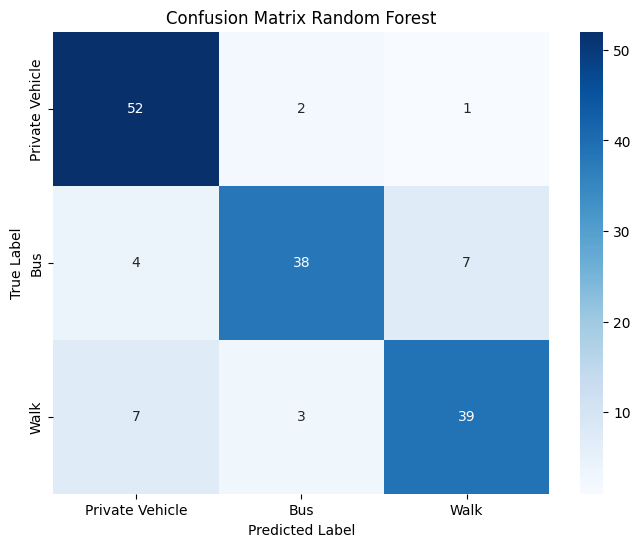

In [37]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
param_grid = {
    'max_features': range(2, 20)
}

rf_model = RandomForestClassifier(random_state=1, n_jobs=-1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 14}


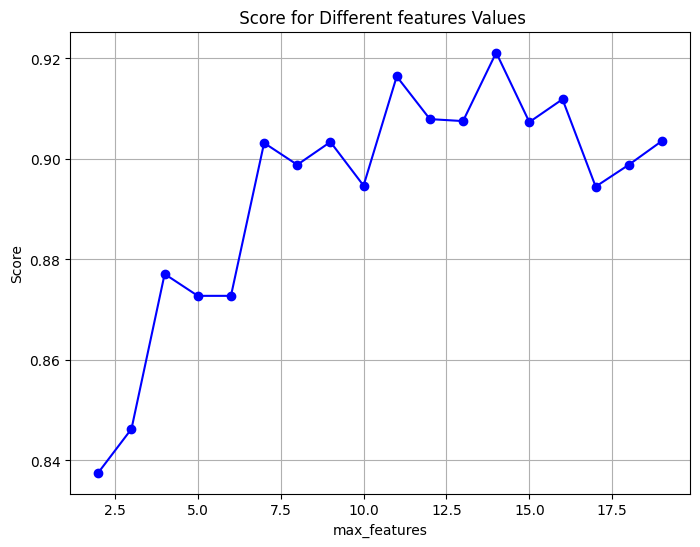

In [39]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [40]:
param_grid = {
    'n_estimators': list(range(50, 301))}
rf_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 141}


In [41]:
X.columns

Index(['Gender', 'Hsize', 'Income', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 and less', 'Age_31 -40', 'Age_41 - 50', 'Age_51 and more',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other'],
      dtype='object')

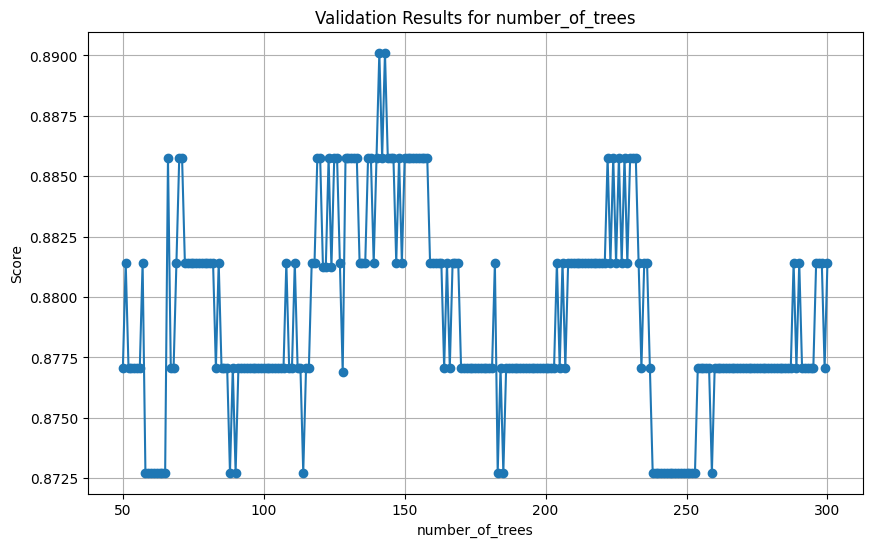

In [42]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

{'max_depth': 7}


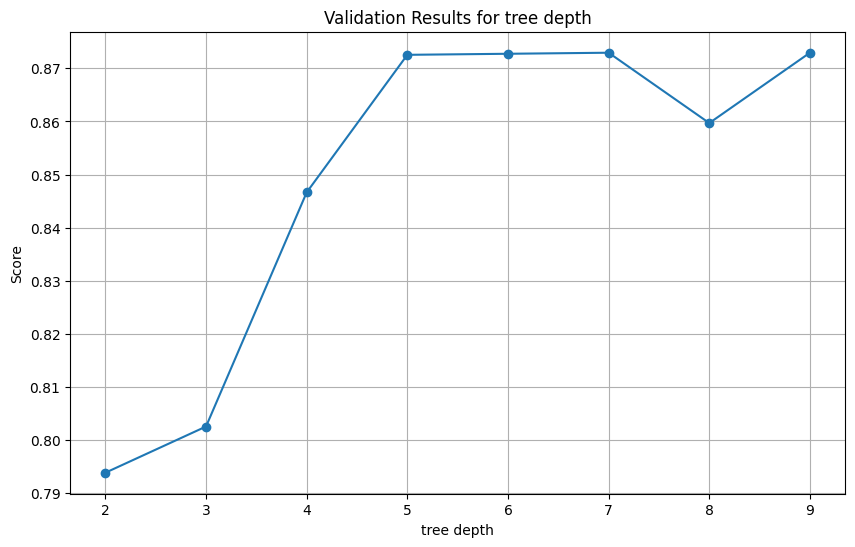

In [43]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]}
rf_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)
number_of_trees = grid_search.cv_results_['param_max_depth']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('tree depth')
plt.ylabel('Score')
plt.title('Validation Results for tree depth')
plt.grid(True)
plt.show()

In [48]:
param_grid = {
    'n_estimators': list(range(125, 142)),
    'max_features': [14],
    'max_depth': [9]}
rf_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_depth': 9, 'max_features': 14, 'n_estimators': 125}


In [49]:
score = grid_search.best_score_
score

0.9211462450592884

In [50]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_train)
reportrfbasic = classification_report(y_train, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        72

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [51]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        55
           1       0.91      0.80      0.85        49
           2       0.80      0.80      0.80        49

    accuracy                           0.86       153
   macro avg       0.86      0.85      0.85       153
weighted avg       0.86      0.86      0.85       153



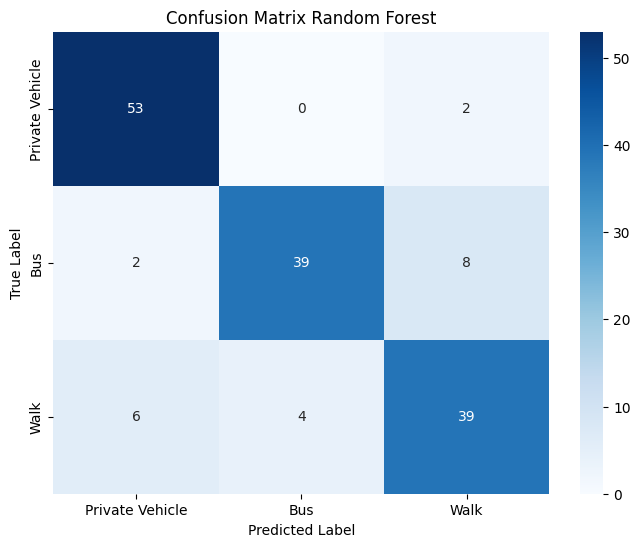

In [52]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

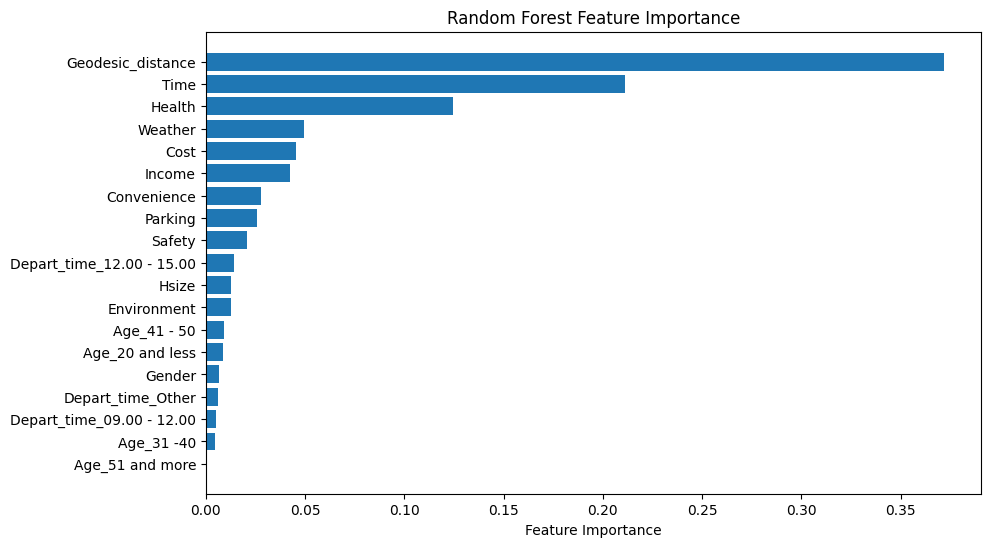

In [53]:
feature_importances = random_forest.feature_importances_



sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

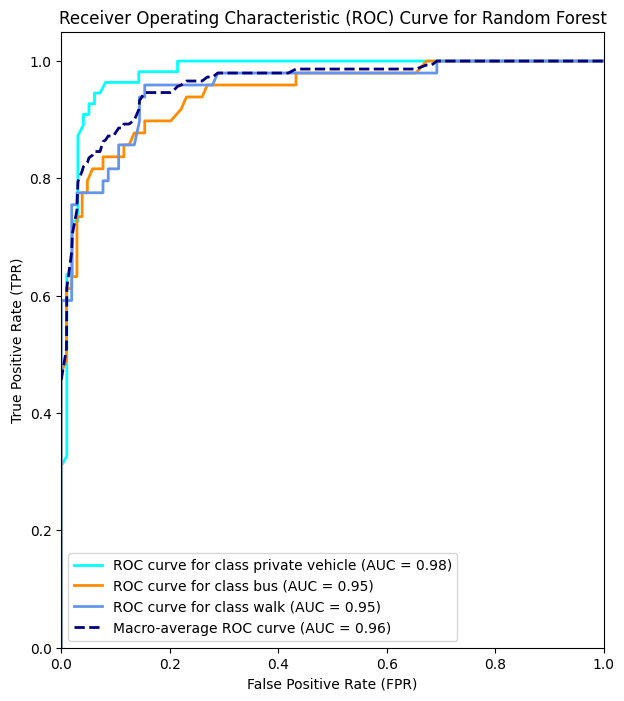

In [54]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(random_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(random_forest.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(random_forest.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(random_forest.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(random_forest.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Random Forest")

plt.show()

In [55]:
roc_auc['macro']

0.9606697724044664

# XGBoost

In [56]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [57]:
xgb_classifier.fit(X_train, y_train)
y_pred_test = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.85      0.96      0.91        55
           1       0.87      0.82      0.84        49
           2       0.87      0.80      0.83        49

    accuracy                           0.86       153
   macro avg       0.86      0.86      0.86       153
weighted avg       0.86      0.86      0.86       153



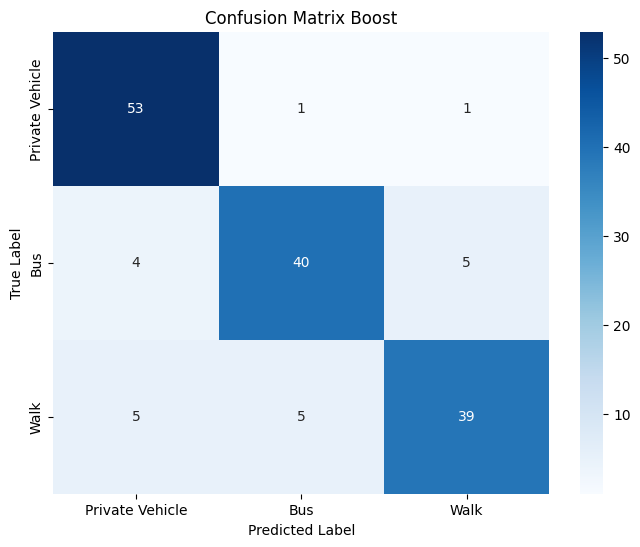

In [58]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

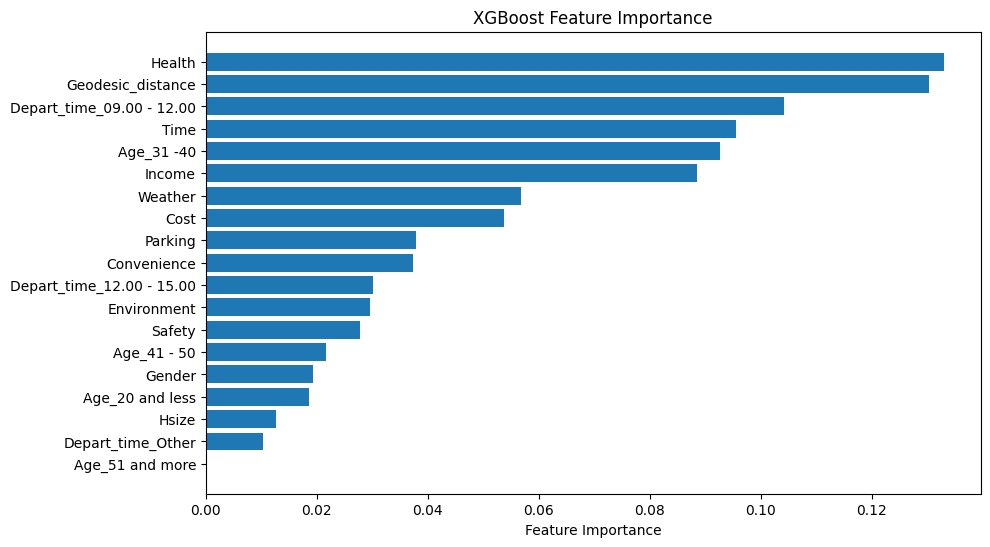

In [59]:
feature_importances = xgb_classifier.feature_importances_



sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

In [60]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [61]:
param_grid = {
    'n_estimators': list(range(50, 301)),
}

In [62]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [63]:
best_params

{'n_estimators': 135}

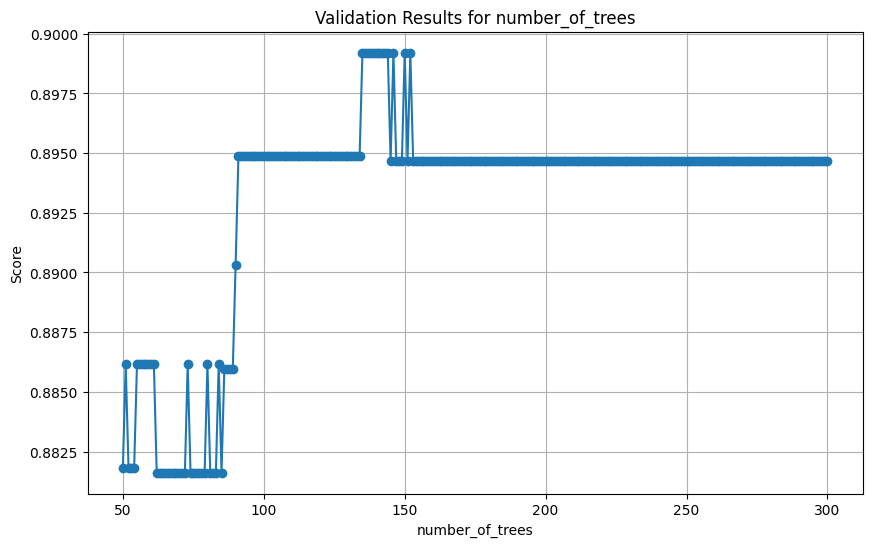

In [64]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [65]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [66]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

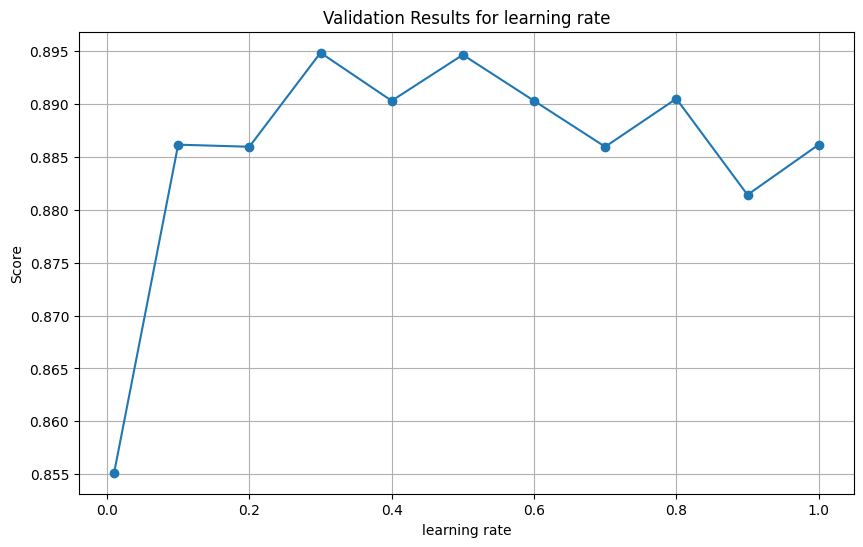

In [67]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

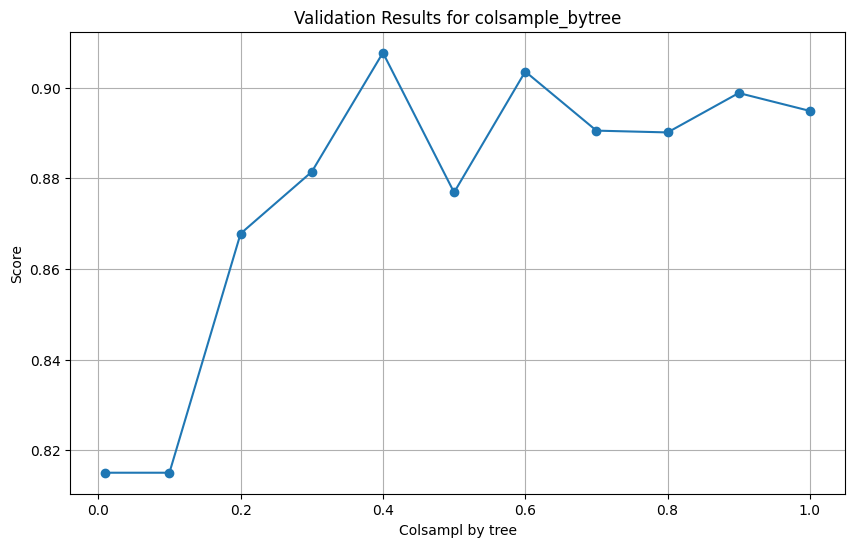

In [68]:
param_grid = {
    'colsample_bytree': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_colsample_bytree']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Colsampl by tree')
plt.ylabel('Score')
plt.title('Validation Results for colsample_bytree')
plt.grid(True)
plt.show()

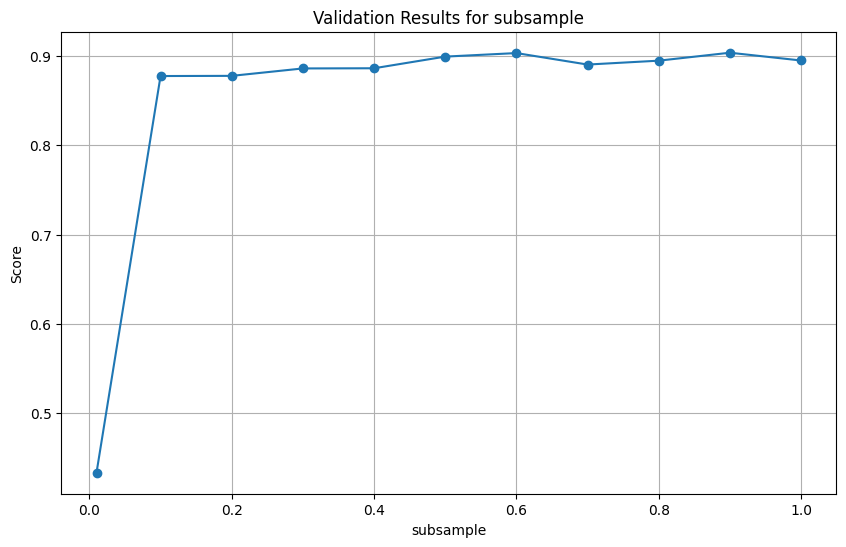

In [69]:
param_grid = {
    'subsample': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_subsample']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.title('Validation Results for subsample')
plt.grid(True)
plt.show()

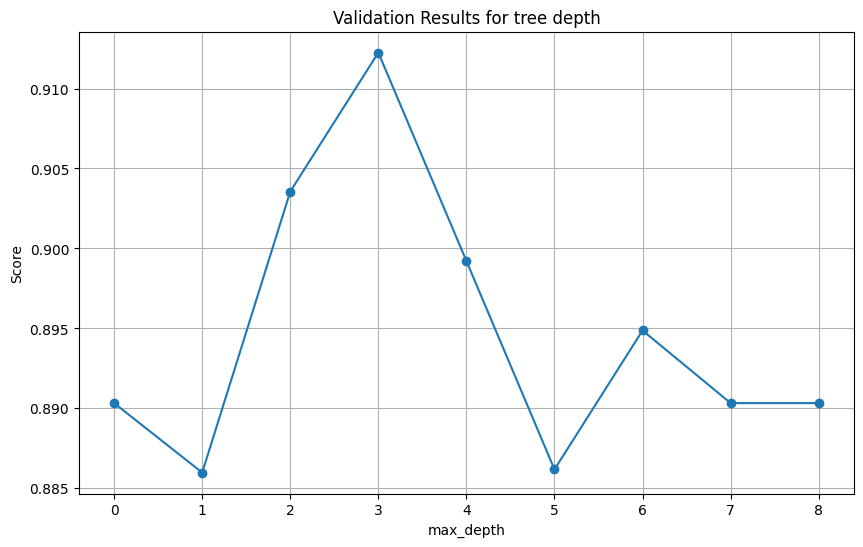

In [70]:
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_max_depth']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Validation Results for tree depth')
plt.grid(True)
plt.show()

In [71]:
param_grid = {
    'n_estimators': list(range(125, 150)),
    'subsample': [0.6],
    'colsample_bytree' : [0.4],
    'learning_rate': [0.3],
    'max_depth':[3]}

In [72]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'colsample_bytree': 0.4, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 126, 'subsample': 0.6}


In [73]:
best_score = grid_search.best_score_
best_score

0.8903162055335969

In [74]:
best_model = grid_search.best_estimator_

In [75]:
y_pred_test = best_model.predict(X_train)
xgbreport = classification_report(y_train, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        72

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [76]:
y_pred_test = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        55
           1       0.91      0.84      0.87        49
           2       0.85      0.80      0.82        49

    accuracy                           0.88       153
   macro avg       0.88      0.87      0.87       153
weighted avg       0.88      0.88      0.87       153



In [77]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

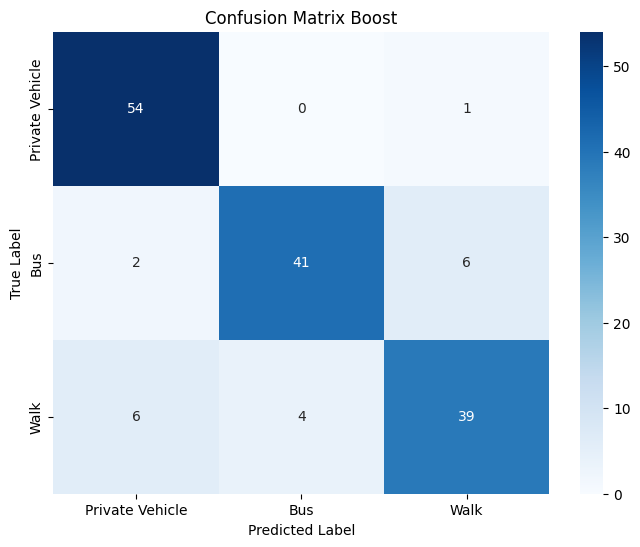

In [78]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

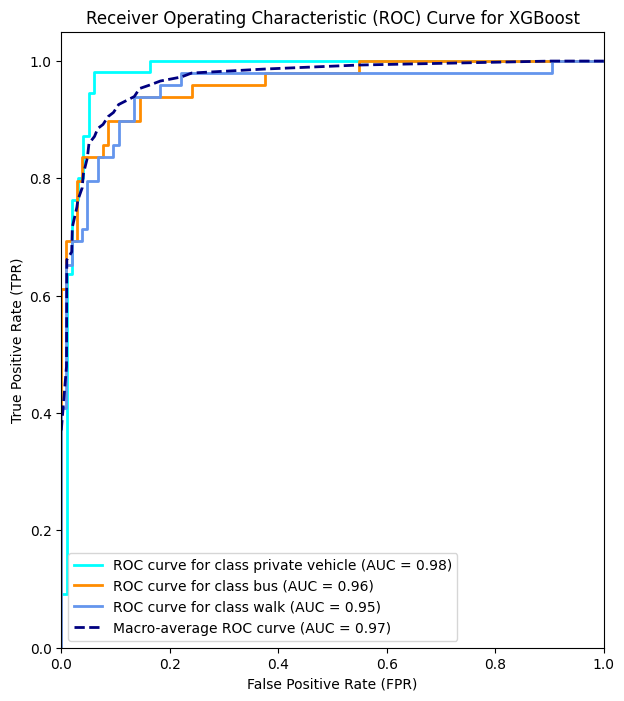

In [79]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(best_model.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(best_model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(best_model.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(best_model.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for XGBoost")

plt.show()

In [80]:
roc_auc['macro']

0.9674516688365086

In [81]:
X.columns

Index(['Gender', 'Hsize', 'Income', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 and less', 'Age_31 -40', 'Age_41 - 50', 'Age_51 and more',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other'],
      dtype='object')

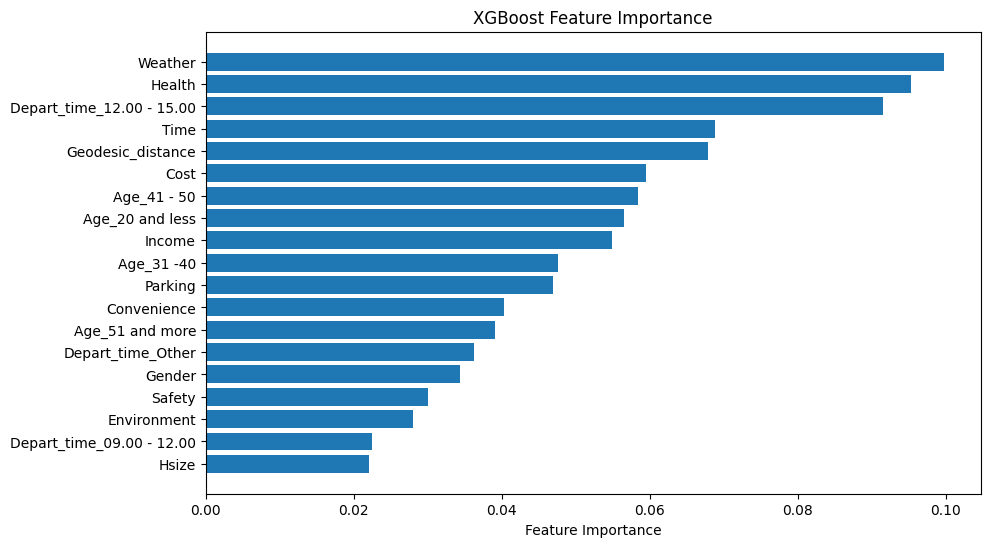

In [82]:
feature_importances = best_model.feature_importances_

feature_names = ['Gender', 'Hsize', 'Income', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Geodesic_distance',
       'Age_20 and less', 'Age_31 -40', 'Age_41 - 50', 'Age_51 and more',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_Other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

# Model Stack

In [83]:
base_classifier1 = RandomForestClassifier(random_state=1,n_jobs=-1)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
base_classifier3 = DecisionTreeClassifier(random_state=12)
meta_classifier = LogisticRegression(multi_class='ovr')
stacking_classifier = StackingCVClassifier(
    classifiers=[base_classifier1, base_classifier2, base_classifier3],
    meta_classifier=meta_classifier,
    cv=10,
    stratify=True,
    random_state=10
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86        55
           1       0.86      0.65      0.74        49
           2       0.83      0.78      0.80        49

    accuracy                           0.81       153
   macro avg       0.82      0.80      0.80       153
weighted avg       0.82      0.81      0.81       153



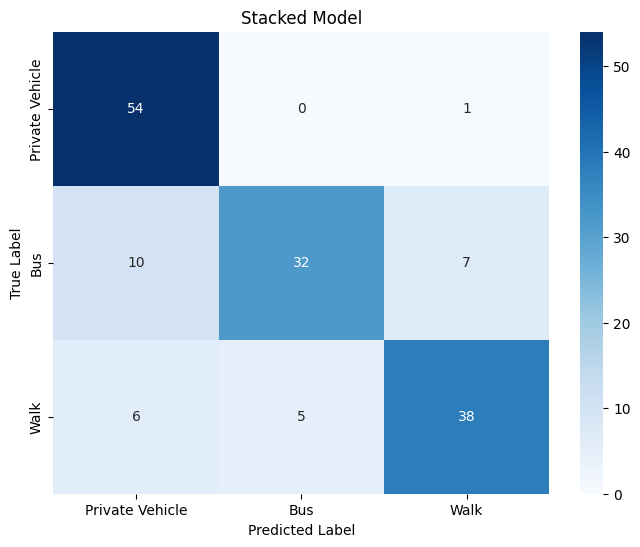

In [84]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Stacked Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [85]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_test_bin = label_binarizer.transform(y_test)
classes = label_binarizer.classes_

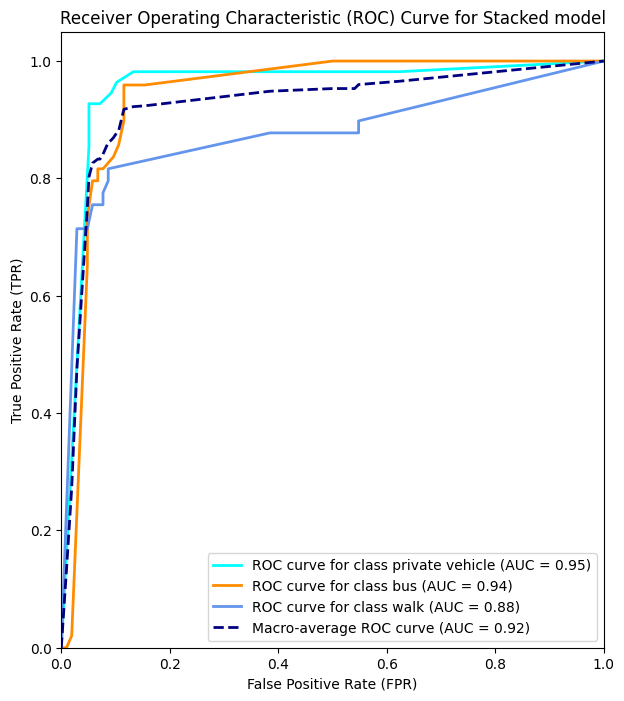

In [86]:
class_probabilities_st = stacking_classifier.predict_proba(X_test)
y_pred_prob_st = np.argmax(class_probabilities_st, axis=1)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_st[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Stacked model")

plt.show()

In [87]:
roc_auc["macro"]

0.924982136425285

In [88]:
base_classifier1 = RandomForestClassifier(random_state=1,n_jobs=-1, max_depth=7, max_features=14, n_estimators=150)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42,
                                    colsample_bytree= 0.9, learning_rate= 0.4, max_depth= 2, n_estimators= 200, subsample= 0.8)
base_classifier3 = DecisionTreeClassifier(random_state=12, max_depth=5, min_samples_leaf = 5, min_samples_split= 2)
meta_classifier = LogisticRegression(multi_class='ovr')
stacking_classifier = StackingCVClassifier(
    classifiers=[base_classifier1, base_classifier2, base_classifier3],
    meta_classifier=meta_classifier,
    cv=10,
    stratify=True,
    random_state=10
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        55
           1       0.90      0.73      0.81        49
           2       0.80      0.84      0.82        49

    accuracy                           0.84       153
   macro avg       0.85      0.84      0.84       153
weighted avg       0.85      0.84      0.84       153



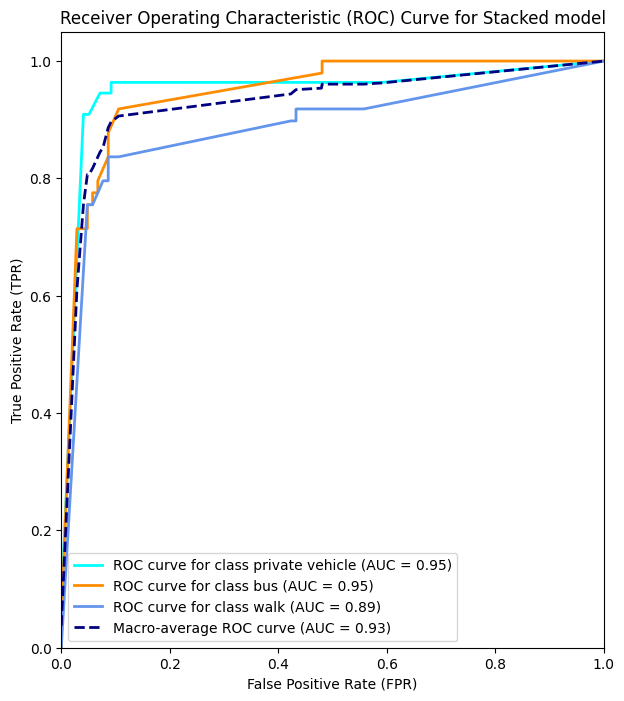

In [89]:
class_probabilities_st = stacking_classifier.predict_proba(X_test)
y_pred_prob_st = np.argmax(class_probabilities_st, axis=1)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_st[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Stacked model")

plt.show()

In [90]:
roc_auc["macro"]

0.9284459345319406